*   **Data Preparation:**
    
    *   Use any small dataset of your choice from `torchvision`, such as CIFAR-10.
    *   Prepare data loaders using `torch.utils.data.DataLoader`.
*   **k-Fold Cross-Validation Implementation:**
    
    *   Create a function that implements k-fold cross-validation.
    *   Split the dataset into k folds, training on k-1 folds, and testing on the remaining fold.
    *   Compute the accuracy of the model for each fold.
*   **Network Definition:**
    
    *   Define a simple neural network with at least one hidden layer using `torch.nn.Module`.
*   **Training and Evaluation:**
    
    *   For each fold, train the model on the training data and evaluate on the validation data.
    *   Report the mean and standard deviation of the accuracy across all folds.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import KFold
import numpy as np

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
dataset = datasets.CIFAR10(root='mnist_data', download=True, transform=transform)

Files already downloaded and verified


Files already downloaded and verified


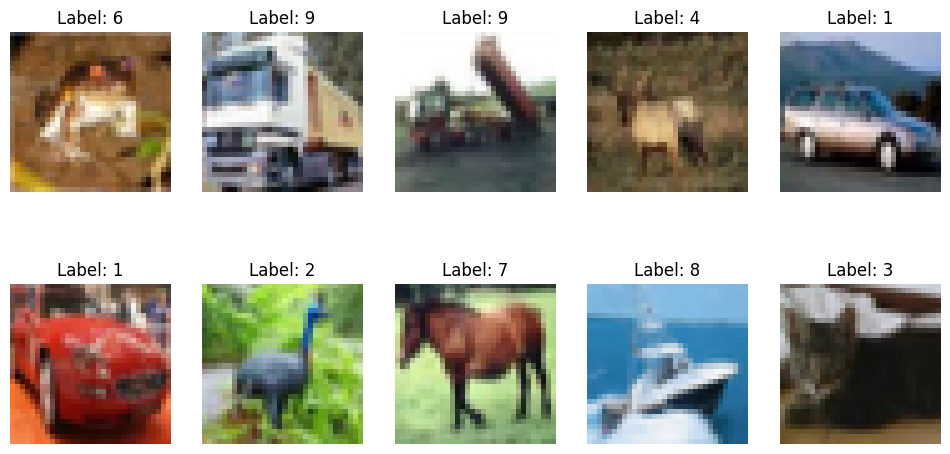

In [3]:
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
dataset = datasets.CIFAR10(root='mnist_data', download=True, transform=transform)

def show_images(images, labels):
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    for i, ax in enumerate(axes.flat):
        image = images[i] / 2 + 0.5
        ax.imshow(image.permute(1, 2, 0))
        ax.set_title(f'Label: {labels[i]}')
        ax.axis('off')
    plt.show()

images = []
labels = []
for i in range(10):
    image, label = dataset[i]
    images.append(image)
    labels.append(label)

show_images(images, labels)

RED NEURONAL LINEAL SIMPLE 3 CAPAS

In [4]:
# Red Neuronal Simple
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1,3* 32 * 32)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

RED NEURONAL CONVOLUCIONAL 4 CAPAS con RELU

In [5]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(16 * 16 * 16, 120)
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = x.view(-1, 16 * 16 * 16)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# añadir bias a la convolucional
# CAMBIAR FUNCIONN DE ACTIVACIÓN

In [6]:
class SimpleCNN02(nn.Module):
    def __init__(self):
        super(SimpleCNN02, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(16 * 16 * 16, 120)
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = x.view(-1, 16 * 16 * 16)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.softmax(x, dim=1)
        return x

# añadir bias a la convolucional
# CAMBIAR FUNCIONN DE ACTIVACIÓN

RED NEURONAL CONVOLUCIONAL 6 CAPAS

In [7]:
import torch.nn.functional as F
# Red Convolucional
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
def KFold_Model(model):
  # k-Fold Cross-Validation
  k = 5
  kf = KFold(n_splits=k, random_state=42, shuffle=True)
  accuracies = []
  torch.manual_seed(42)

  for train_idx, test_idx in kf.split(dataset):
      train_subset = Subset(dataset, train_idx)
      test_subset = Subset(dataset, test_idx)

      train_loader = DataLoader(train_subset, batch_size=64, shuffle=True)
      test_loader = DataLoader(test_subset, batch_size=64, shuffle=False)

      criterion = nn.CrossEntropyLoss()
      optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

      # Training loop
      for epoch in range(5):
          model.train()
          for images, labels in train_loader:
              optimizer.zero_grad()
              outputs = model(images)
              loss = criterion(outputs, labels)
              loss.backward()
              optimizer.step()

      # Evaluation
      model.eval()
      correct = 0
      total = 0
      with torch.no_grad():
          for images, labels in test_loader:
              outputs = model(images)
              _, predicted = torch.max(outputs, 1)
              total += labels.size(0)
              correct += (predicted == labels).sum().item()

      accuracy = 100 * correct / total
      accuracies.append(accuracy)
      print(f'Fold Accuracy: {accuracy}%')

  print(f'Mean Accuracy: {np.mean(accuracies)}%')
  print(f'Standard Deviation: {np.std(accuracies)}%')

# CODIGO DE PRUEBA

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def KFold_Model(model):
    # k-Fold Cross-Validation
    k = 5
    kf = KFold(n_splits=k, random_state=42, shuffle=True)
    accuracies = []
    torch.manual_seed(42)

    for train_idx, test_idx in kf.split(dataset):
        train_subset = Subset(dataset, train_idx)
        test_subset = Subset(dataset, test_idx)

        train_loader = DataLoader(train_subset, batch_size=64, shuffle=True)
        test_loader = DataLoader(test_subset, batch_size=64, shuffle=False)

        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

        # Training loop
        for epoch in range(5):
            model.train()
            for images, labels in train_loader:
                optimizer.zero_grad()
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

        # Evaluation
        model.eval()
        correct = 0
        total = 0
        y_true = []
        y_pred = []
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                y_true.extend(labels.numpy())
                y_pred.extend(predicted.numpy())

        accuracy = 100 * correct / total
        accuracies.append(accuracy)
        print(f'Fold Accuracy: {accuracy}%')

        # Confusion Matrix
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

    print(f'Mean Accuracy: {np.mean(accuracies)}%')
    print(f'Standard Deviation: {np.std(accuracies)}%')

# .

RED NEURONAL LINEAL SIMPLE

In [ ]:
model = SimpleNN()
KFold_Model(model)

RED NEURONAL CONVOLUCIONAL

In [ ]:
model = CNN()
KFold_Model(model)

CONVOLUCIONAL SIMPLE

Fold Accuracy: 64.69%


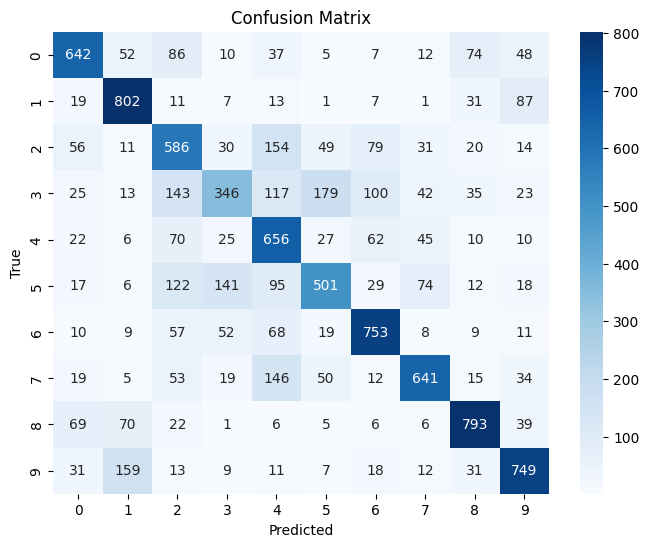

Fold Accuracy: 70.94%


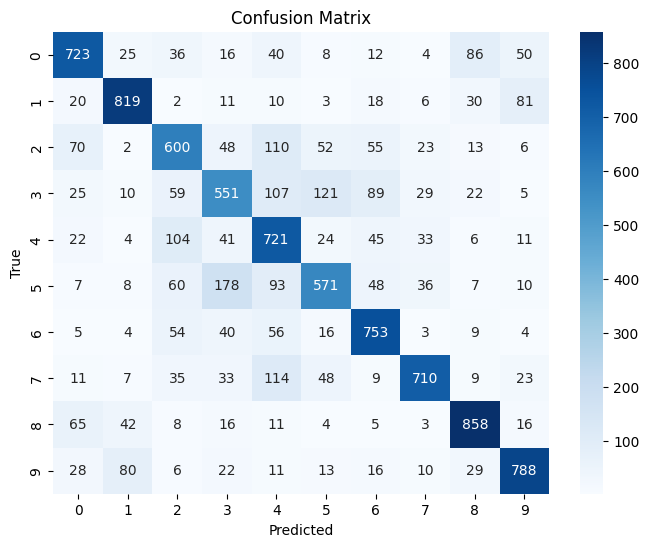

Fold Accuracy: 81.4%


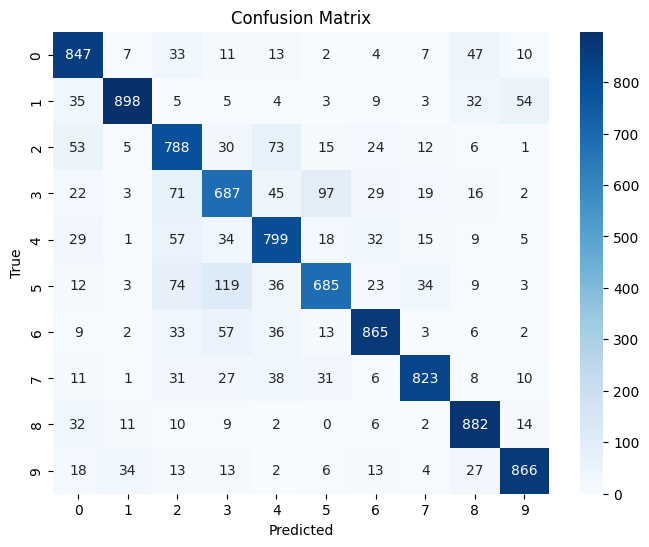

Fold Accuracy: 90.11%


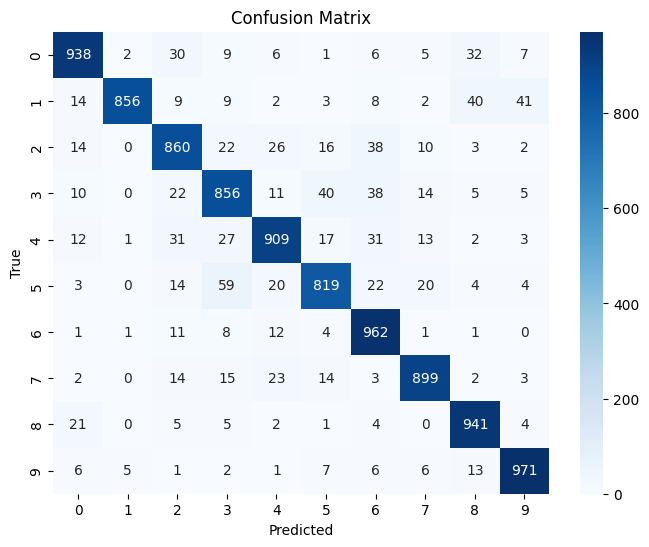

Fold Accuracy: 96.24%


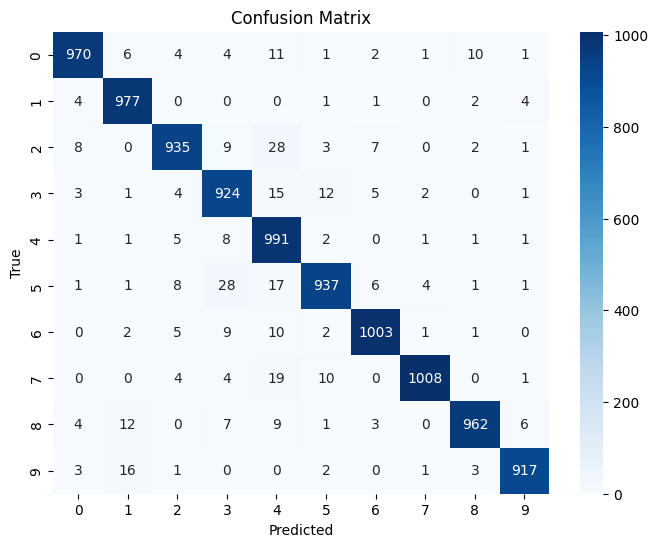

Mean Accuracy: 80.676%
Standard Deviation: 11.67993595872854%


In [9]:
model = SimpleCNN()
KFold_Model(model)

Matriz de confusión

Explanation: A simple neural network with three linear layers and ReLU activations is defined.



### Exercise 2: Dropout Regularization

#### Goal

Apply dropout regularization to a neural network to improve its robustness.

#### Instructions

1.  **Data Preparation:**
    
    *   Use the same dataset as in Exercise 1.
2.  **Network Definition:**
    
    *   Define a neural network with multiple layers using `torch.nn.Module`.
    *   Add dropout layers after each hidden layer using `torch.nn.Dropout`.
3.  **Training and Evaluation:**
    
    *   Train the model on the training dataset, evaluating on a separate validation set.
    *   Experiment with different dropout rates (e.g., 0.2, 0.5, 0.7).
    *   Observe how dropout affects the model's performance, especially underfitting and overfitting.
4.  **Analysis:**
    
    *   Plot training and validation accuracy curves for different dropout rates.
    *   Discuss the results, noting any significant changes in accuracy or overfitting.

In [ ]:
class DropoutCNN(nn.Module):
    def __init__(self, dropout_rate):
        super(DropoutCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(16 * 16 * 16, 120)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = x.view(-1, 16 * 16 * 16)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [ ]:
# Function to train and evaluate the model
def train_evaluate(dropout_rate):
    model = DropoutCNN(dropout_rate)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    train_loader = DataLoader(dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(dataset, batch_size=64, shuffle=False)

    for epoch in range(5):
        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return 100 * correct / total

# Evaluate for different dropout rates
dropout_rates = [0.2, 0.5, 0.7]
accuracies = [train_evaluate(rate) for rate in dropout_rates]

In [ ]:
print("dropout_rates: ",dropout_rates)
print("accuracies: ",accuracies)

### Exercise 3: L1 Regularization

#### Goal

Implement L1 regularization to constrain model weights and reduce overfitting.

#### Instructions

1.  **Data Preparation:**
    
    *   Use the same dataset as in Exercise 1.
2.  **Network Definition:**
    
    *   Define a neural network with at least one hidden layer using `torch.nn.Module`.
3.  **L1 Regularization Implementation:**
    
    *   Add L1 regularization to the loss function by including the sum of the absolute values of model weights.
    *   Manually calculate the L1 loss and add it to the main loss function.
4.  **Training and Evaluation:**
    
    *   Train the model with and without L1 regularization.
    *   Compare the results in terms of overfitting and weight sparsity.
5.  **Analysis:**
    *   Plot weight histograms to visualize the effect of L1 regularization.
    *   Report accuracy and loss for both regularized and non-regularized models.

In [ ]:
# Network Definition
...

In [ ]:
# L1 Regularization Loss Calculation
...


In [ ]:
# Training and Evaluation with L1 Regularization
...
# Evaluate with and without L1 Regularization
...